# **_Story Telling_; second challenge**

_**Abstract**_

This project focuses on the analysis and modeling of E. Coli growth data to generate a synthetic dataset with similar properties to the original data. The original dataset includes key variables such as `s_b_um_ss` (initial size), `s_d_um_ss` (final size), `gen_time_min_ss` (generation time), and `elongation_rate_ss` (elongation rate). The columns `FOV_ID_ss` and `channel_ID_ss` were deemed non-essential and thus excluded from the analysis.

**Objectives**
1. **Explore Correlations**: Analyze the relationships between the key variables to understand their interactions.
2. **Model Development**: Develop a simple yet effective model to describe the relationship between the variables.
3. **Generate Synthetic Data**: Use the developed model to create a new dataset that mimics the statistical properties of the original dataset.

**Methodology**
1. **Data Cleaning**: Removed non-essential columns and prepared the data for analysis.
2. **Correlation Analysis**: Computed and visualized the correlation matrix to identify strong relationships between variables.
3. **Model Formulation**: Based on observed correlations, formulated an exponential growth model (given by the proffesor in class):
$$S_d = S_be^{\lambda t_d} \;\;;\;\; S_d = S_b2^{\lambda t_d}$$
4. **Parameter Estimation**: Used non-linear regression to fit the model parameters.
5. **Synthetic Data Generation**: Generated new data by sampling from the distributions of the fitted parameters and adding realistic variations.

**Assumptions**
1. **Interdependence of Variables**: Assumes that `s_b_um_ss` and `s_d_um_ss` are not independent and are related through the exponential growth model.
2. **Exponential Growth**: Assumes that E. Coli cells elongate exponentially over time.
3. **Normal Distribution of Variations**: Assumes that the residuals or errors follow a normal distribution, which is typical in biological datasets.

_**Results**_

The generated synthetic dataset maintains the structural properties and relationships observed in the original data, providing a valuable resource for further analysis and simulations.

## Libraries

In [89]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.optimize import curve_fit

## Files

In [85]:
glucose_6aa=pd.read_csv('glucose_6aa.txt',sep='	')
glucose_12aa=pd.read_csv('glucose_12aa.txt',sep='\t')
glucose=pd.read_csv('glucose.txt',sep=' ')
glycerol=pd.read_csv('glycerol.txt',sep='\t')
sorbitol=pd.read_csv('sorbitol.txt',sep=' ')
synthetic_rich=pd.read_csv('synthetic_rich.txt',sep=' ')
tsb = pd.read_csv('TSB.txt', sep ='\t') 

## Exploration in each file

### _glucose_6aa_ database

In [53]:
glucose_6aa

,FOV_ID_ss,channel_ID_ss,elongation_rate_ss,gen_time_min_ss,s_b_um_ss,s_d_um_ss,delta_s_ss
0,1,40,0.031471,33.0,2.340,4.615,2.275
1,1,40,0.034042,25.5,2.535,4.485,1.950
2,1,40,0.033643,31.5,2.145,4.225,2.080
3,1,40,0.032837,30.0,2.145,4.225,2.080
4,1,40,0.032452,36.0,2.210,5.005,2.795
...,...,...,...,...,...,...,...
16837,30,100,0.031161,33.0,2.665,5.460,2.795
16838,30,100,0.032125,28.5,2.665,5.265,2.600
16839,30,100,0.030352,24.0,2.730,4.615,1.885
16840,30,100,0.030247,33.0,2.340,4.745,2.405


In [54]:
#Let's drop the columns that we don't need
glucose_6aa = glucose_6aa.drop(columns=['FOV_ID_ss', 'channel_ID_ss'])

In [55]:
glucose_6aa

,elongation_rate_ss,gen_time_min_ss,s_b_um_ss,s_d_um_ss,delta_s_ss
0,0.031471,33.0,2.340,4.615,2.275
1,0.034042,25.5,2.535,4.485,1.950
2,0.033643,31.5,2.145,4.225,2.080
3,0.032837,30.0,2.145,4.225,2.080
4,0.032452,36.0,2.210,5.005,2.795
...,...,...,...,...,...
16837,0.031161,33.0,2.665,5.460,2.795
16838,0.032125,28.5,2.665,5.265,2.600
16839,0.030352,24.0,2.730,4.615,1.885
16840,0.030247,33.0,2.340,4.745,2.405


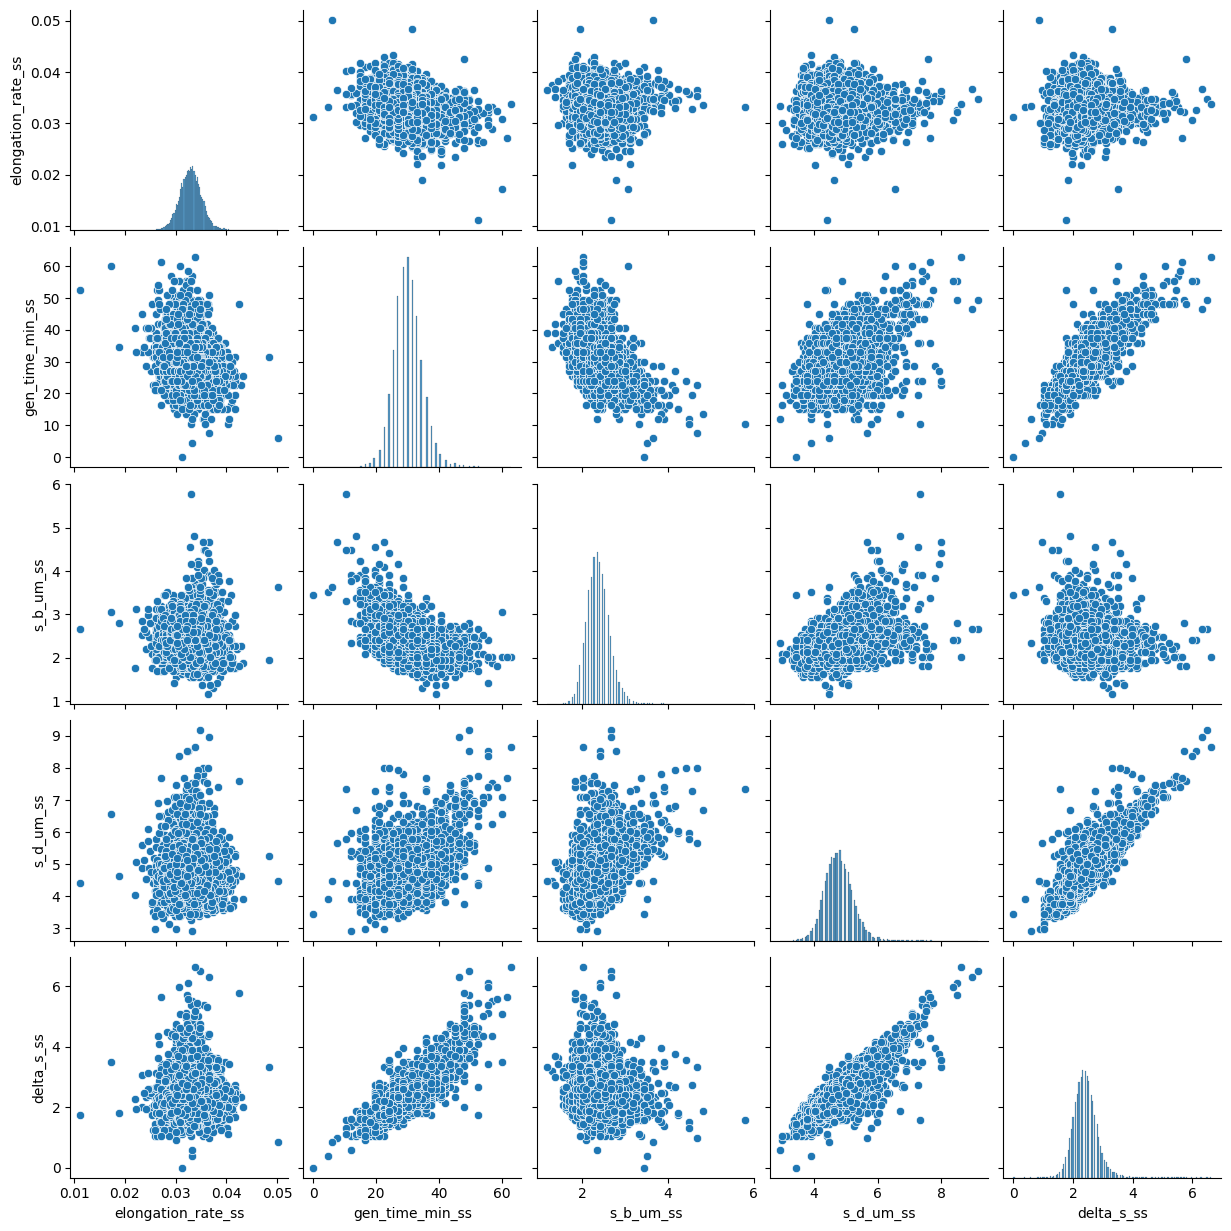

In [56]:
sns.pairplot(glucose_6aa)

In [57]:
corr_glusoce_6aa = glucose_6aa.corr()
corr_glusoce_6aa.style.background_gradient(cmap='coolwarm')

,elongation_rate_ss,gen_time_min_ss,s_b_um_ss,s_d_um_ss,delta_s_ss
elongation_rate_ss,1.000000,-0.295060,-0.081904,0.000483,0.055464
gen_time_min_ss,-0.295060,1.000000,-0.520471,0.371559,0.775670
s_b_um_ss,-0.081904,-0.520471,1.000000,0.499060,-0.097237
s_d_um_ss,0.000483,0.371559,0.499060,1.000000,0.813934
delta_s_ss,0.055464,0.775670,-0.097237,0.813934,1.000000


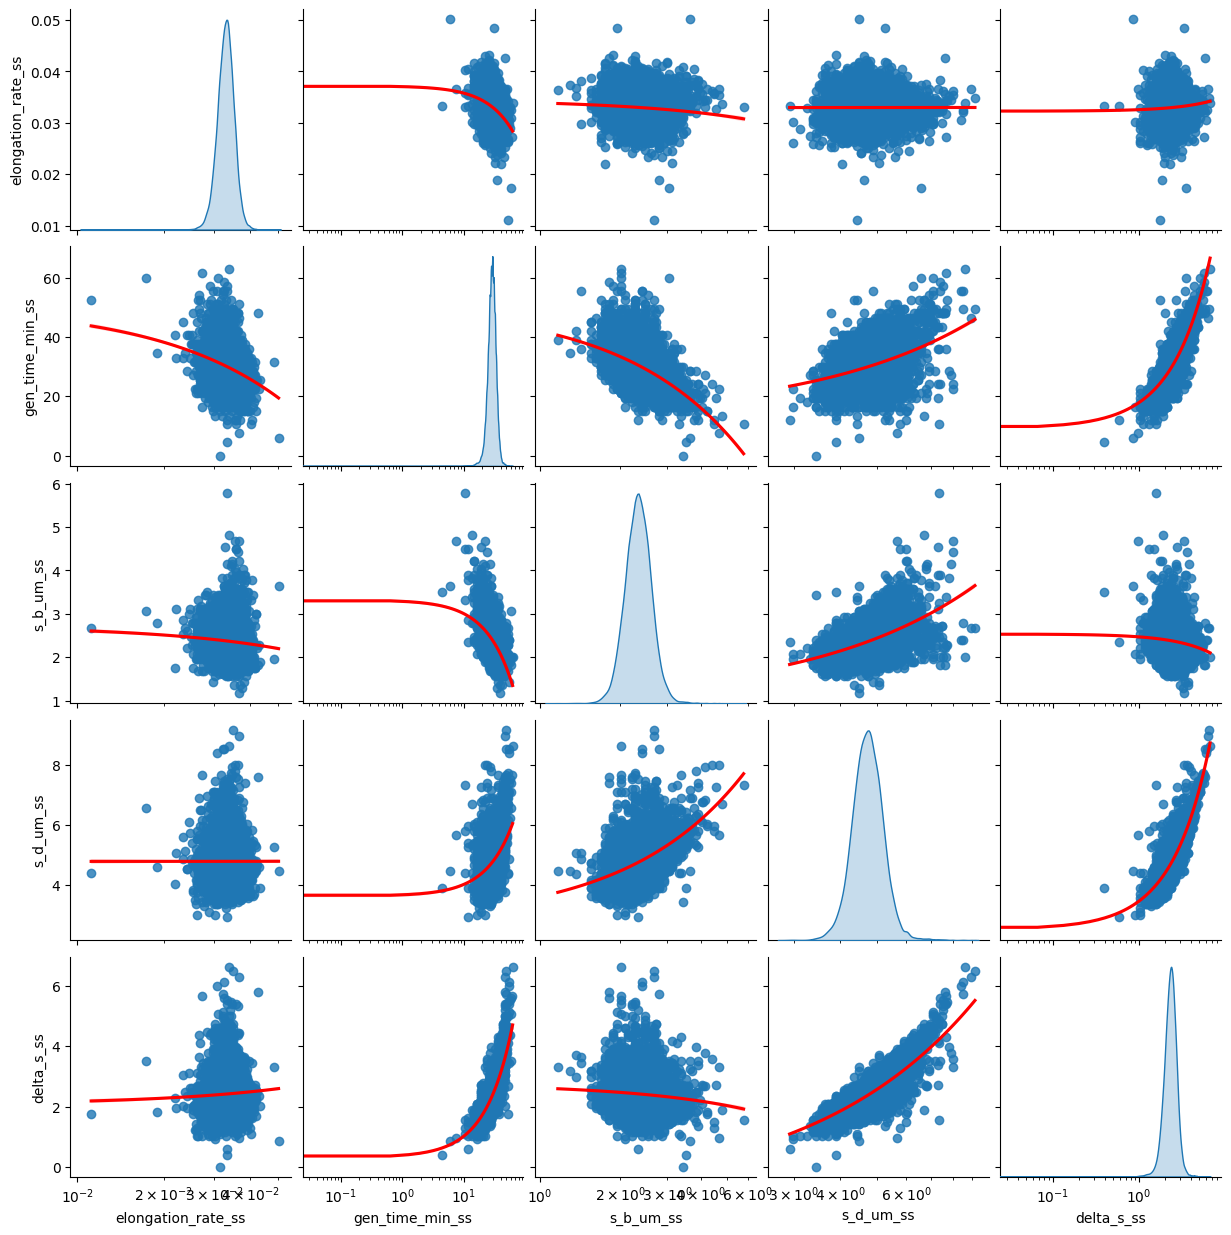

In [58]:
pp = sns.pairplot(glucose_6aa, kind="reg", diag_kind="kde", plot_kws={'line_kws':{'color':'red'}})

log_columns = ["elongation_rate_ss","gen_time_min_ss", 	"s_b_um_ss", 	"s_d_um_ss", 	"delta_s_ss"]

for ax in pp.axes.flat:
    if ax.get_xlabel() in log_columns:
        ax.set(xscale="log")
        #ax.set(yscale="log")

### _glucose_12aa_ database

In [59]:
glucose_12aa

,FOV_ID_ss,channel_ID_ss,elongation_rate_ss,gen_time_min_ss,s_b_um_ss,s_d_um_ss,delta_s_ss
0,1,10,0.034824,27,2.860,5.785,2.925
1,1,10,0.038860,23,2.990,5.525,2.535
2,1,10,0.036341,23,2.860,5.070,2.210
3,1,10,0.038073,28,2.535,5.460,2.925
4,1,10,0.038500,29,2.795,6.045,3.250
...,...,...,...,...,...,...,...
13308,13,290,0.039026,26,2.600,5.330,2.730
13309,13,290,0.038054,27,2.665,5.655,2.990
13310,13,290,0.035791,28,2.860,5.850,2.990
13311,13,290,0.037469,28,2.990,6.175,3.185


In [60]:
#Let's drop the columns that we don't need
glucose_12aa = glucose_12aa.drop(columns=['FOV_ID_ss', 'channel_ID_ss'])

In [61]:
glucose_12aa

,elongation_rate_ss,gen_time_min_ss,s_b_um_ss,s_d_um_ss,delta_s_ss
0,0.034824,27,2.860,5.785,2.925
1,0.038860,23,2.990,5.525,2.535
2,0.036341,23,2.860,5.070,2.210
3,0.038073,28,2.535,5.460,2.925
4,0.038500,29,2.795,6.045,3.250
...,...,...,...,...,...
13308,0.039026,26,2.600,5.330,2.730
13309,0.038054,27,2.665,5.655,2.990
13310,0.035791,28,2.860,5.850,2.990
13311,0.037469,28,2.990,6.175,3.185


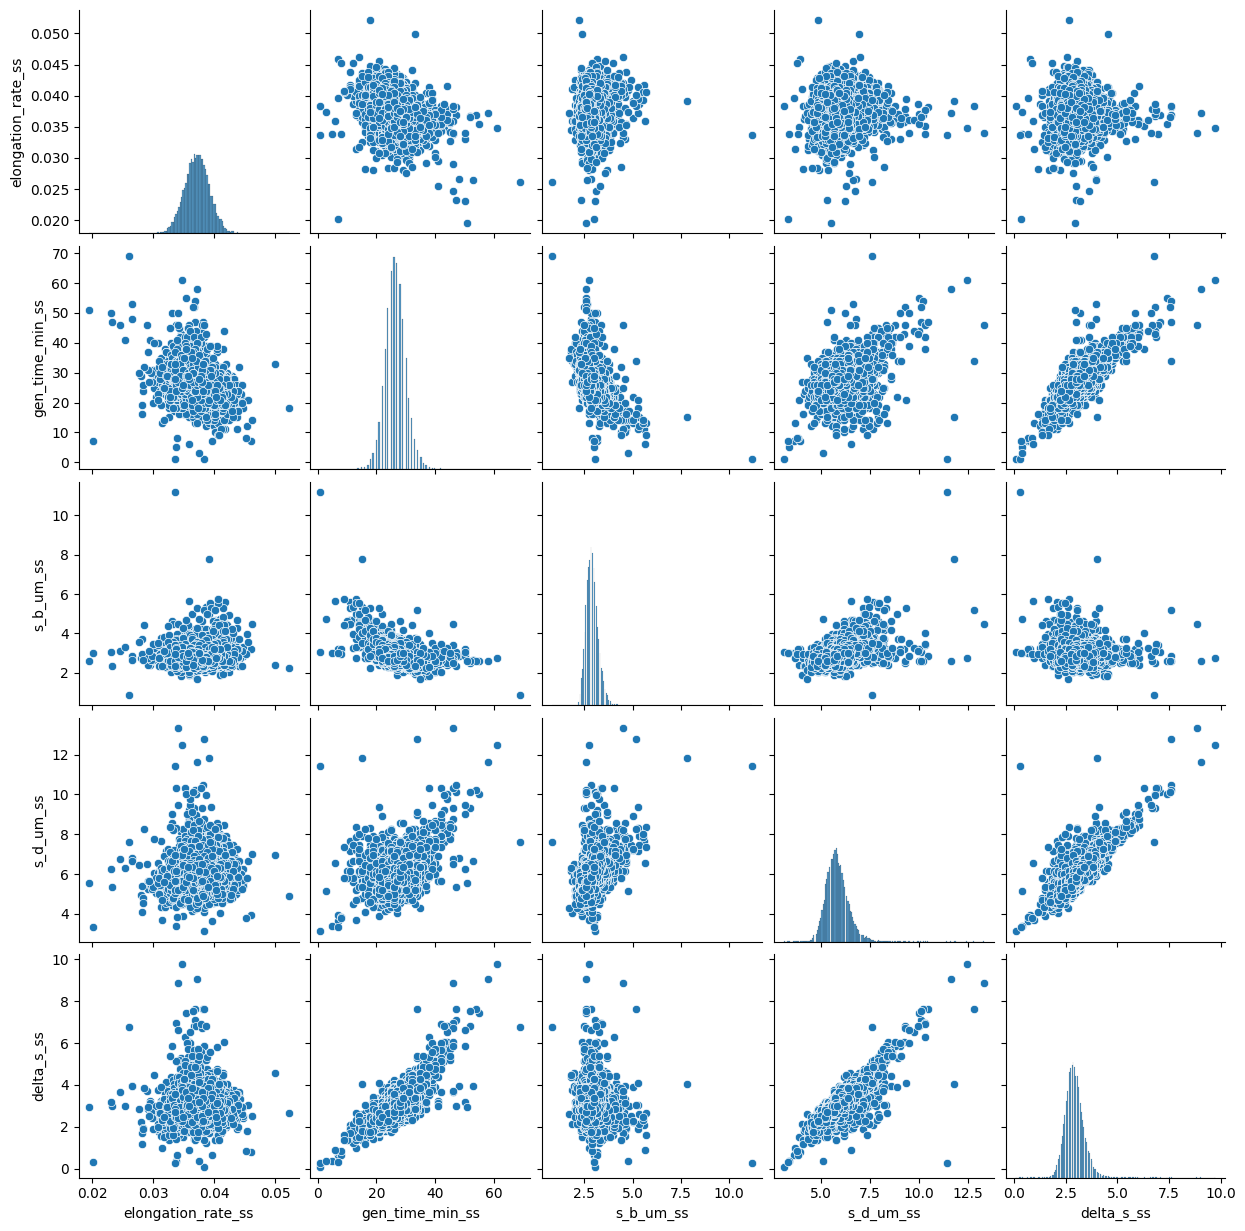

In [62]:
sns.pairplot(glucose_12aa)

In [63]:
corr_glusoce_12aa = glucose_12aa.corr()
corr_glusoce_12aa.style.background_gradient(cmap='coolwarm')

,elongation_rate_ss,gen_time_min_ss,s_b_um_ss,s_d_um_ss,delta_s_ss
elongation_rate_ss,1.000000,-0.314072,0.082178,0.118612,0.087390
gen_time_min_ss,-0.314072,1.000000,-0.517040,0.312713,0.740640
s_b_um_ss,0.082178,-0.517040,1.000000,0.571478,0.000960
s_d_um_ss,0.118612,0.312713,0.571478,1.000000,0.821166
delta_s_ss,0.087390,0.740640,0.000960,0.821166,1.000000


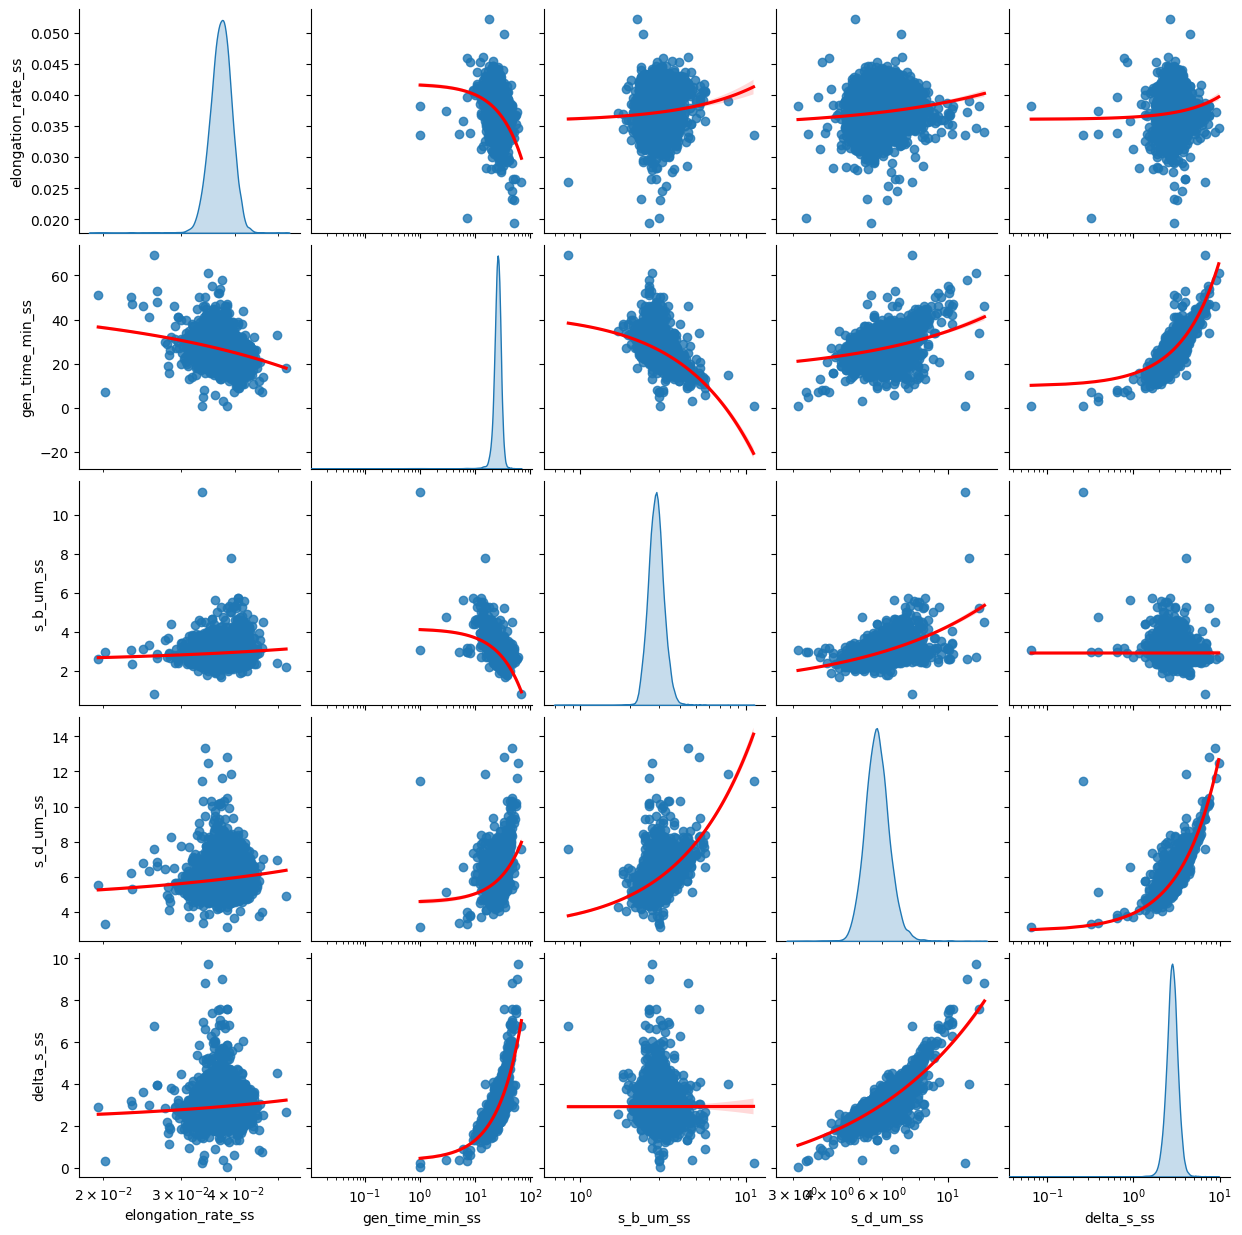

In [64]:
pp = sns.pairplot(glucose_12aa, kind="reg", diag_kind="kde", plot_kws={'line_kws':{'color':'red'}})

log_columns = ["elongation_rate_ss","gen_time_min_ss", 	"s_b_um_ss", 	"s_d_um_ss", 	"delta_s_ss"]

for ax in pp.axes.flat:
    if ax.get_xlabel() in log_columns:
        ax.set(xscale="log")
        #ax.set(yscale="log")

### _TSB_ database

In [65]:
tsb

,FOV_ID_ss,channel_ID_ss,elongation_rate_ss,gen_time_min_ss,s_b_um_ss,s_d_um_ss,delta_s_ss
0,1,20,0.062614,18.00,3.055,6.825,3.770
1,1,20,0.057214,20.25,3.250,7.410,4.160
2,1,20,0.056084,17.25,3.835,7.475,3.640
3,1,20,0.060448,18.00,3.445,7.345,3.900
4,1,20,0.053929,16.50,3.770,6.955,3.185
...,...,...,...,...,...,...,...
11107,29,201,0.059627,19.50,3.900,8.905,5.005
11108,29,201,0.046643,13.50,4.420,7.020,2.600
11109,29,201,0.054592,20.25,3.575,8.060,4.485
11110,29,201,0.059715,15.75,4.160,8.320,4.160


In [66]:
#Let's drop the columns that we don't need
tsb = tsb.drop(columns=['FOV_ID_ss', 'channel_ID_ss'])

In [67]:
tsb

,elongation_rate_ss,gen_time_min_ss,s_b_um_ss,s_d_um_ss,delta_s_ss
0,0.062614,18.00,3.055,6.825,3.770
1,0.057214,20.25,3.250,7.410,4.160
2,0.056084,17.25,3.835,7.475,3.640
3,0.060448,18.00,3.445,7.345,3.900
4,0.053929,16.50,3.770,6.955,3.185
...,...,...,...,...,...
11107,0.059627,19.50,3.900,8.905,5.005
11108,0.046643,13.50,4.420,7.020,2.600
11109,0.054592,20.25,3.575,8.060,4.485
11110,0.059715,15.75,4.160,8.320,4.160


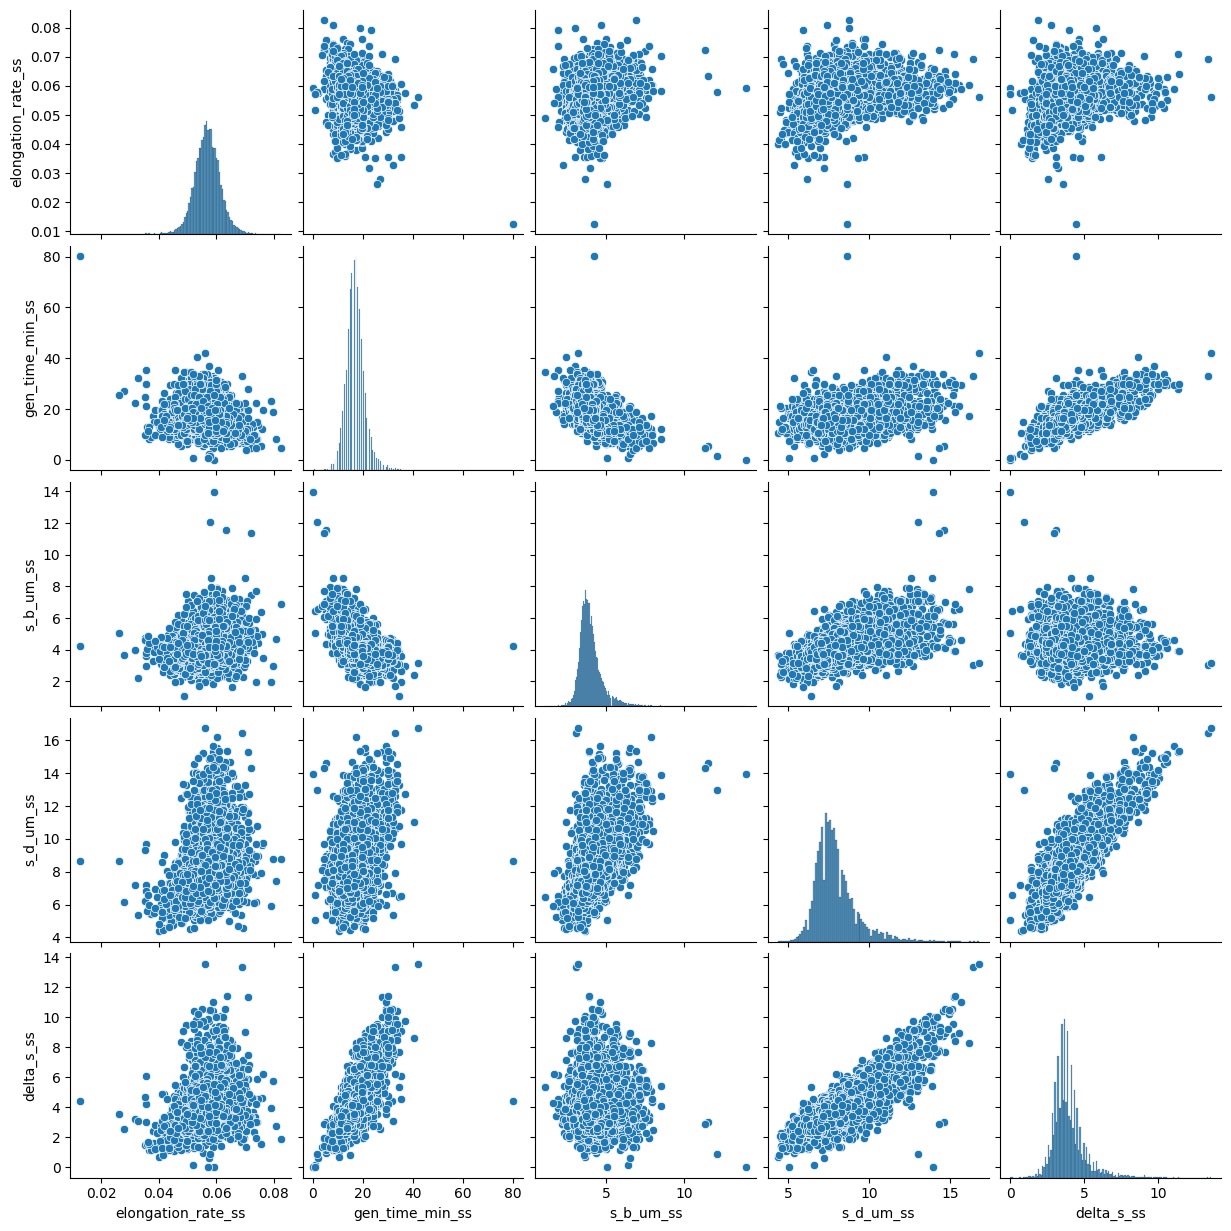

In [68]:
sns.pairplot(tsb)

In [69]:
corr_tsb = tsb.corr()
corr_tsb.style.background_gradient(cmap='coolwarm')

,elongation_rate_ss,gen_time_min_ss,s_b_um_ss,s_d_um_ss,delta_s_ss
elongation_rate_ss,1.000000,-0.209487,0.178102,0.266621,0.207644
gen_time_min_ss,-0.209487,1.000000,-0.517550,0.315177,0.729368
s_b_um_ss,0.178102,-0.517550,1.000000,0.576419,0.040200
s_d_um_ss,0.266621,0.315177,0.576419,1.000000,0.839666
delta_s_ss,0.207644,0.729368,0.040200,0.839666,1.000000


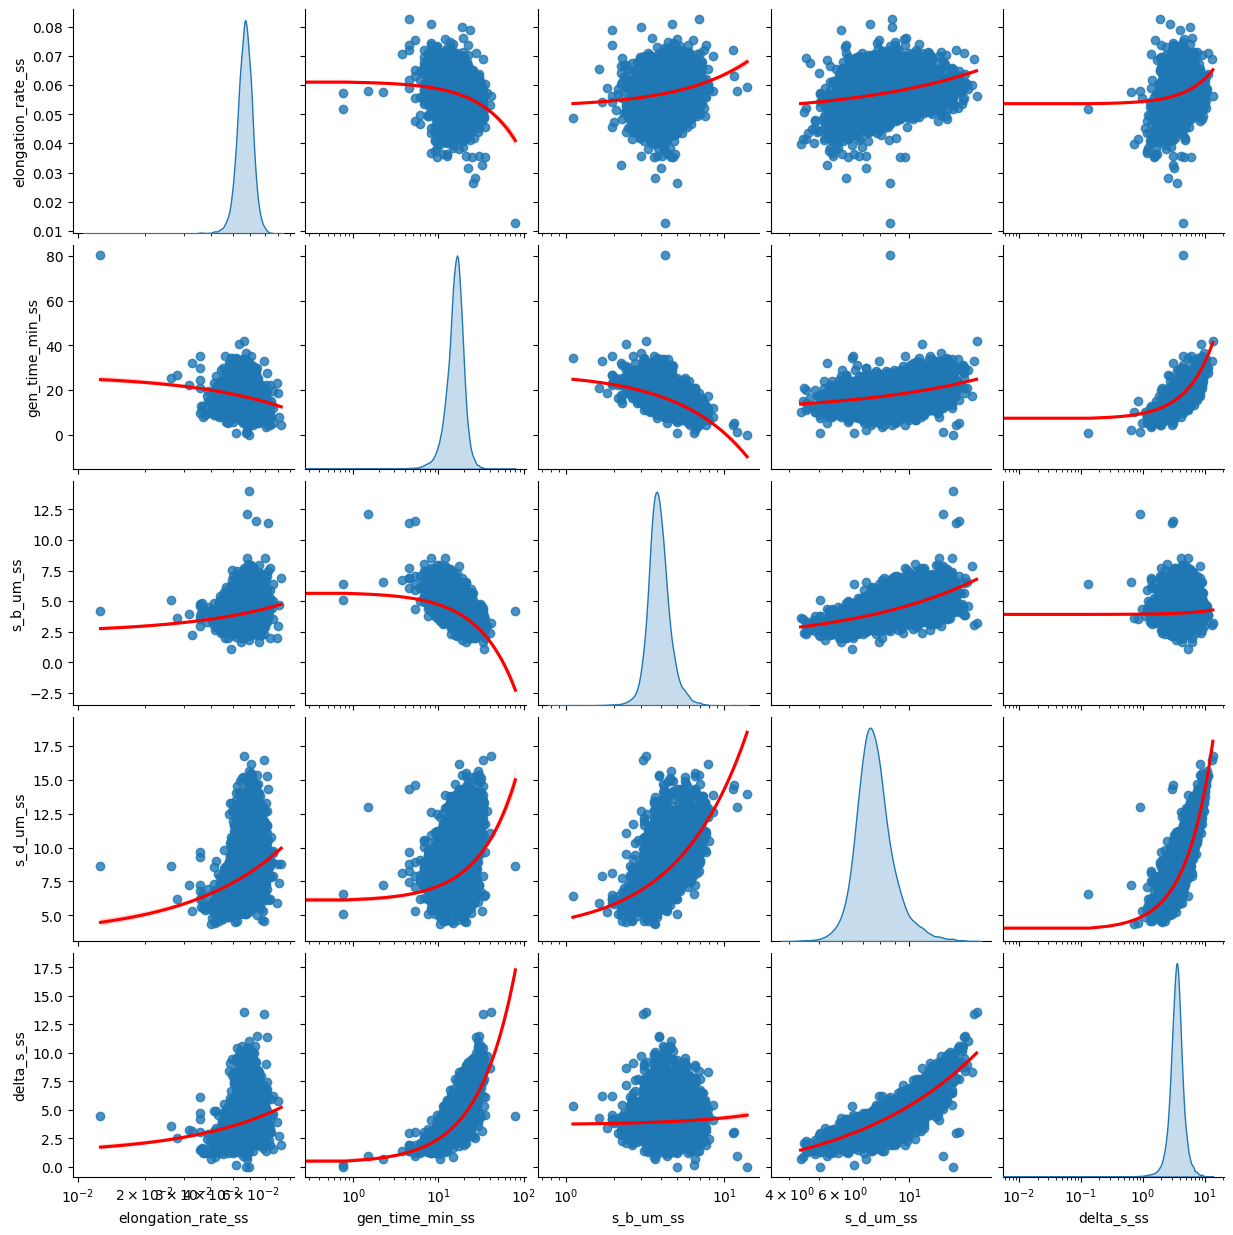

In [70]:
pp = sns.pairplot(tsb, kind="reg", diag_kind="kde", plot_kws={'line_kws':{'color':'red'}})

log_columns = ["elongation_rate_ss","gen_time_min_ss", 	"s_b_um_ss", 	"s_d_um_ss", 	"delta_s_ss"]

for ax in pp.axes.flat:
    if ax.get_xlabel() in log_columns:
        ax.set(xscale="log")
        #ax.set(yscale="log")

## Models

### Model 0

_**Assumptions:**_
1) **Non-independence between $S_b$ and $S_d$:**
Assuming that $S_b$ (initial size) and $S_d$ (final size) are non-independently related.
2) **Exponential elongation of cells:**
Assuming that the bacterial cells elongate exponentially during the generation time. This relationship is described by the equation
$S_d = S_be^{\lambda*t}$
3) **Normal distribution of variations:**
Random variations for $\lambda$, $t_d$ and $S_b$ were generated using normal distribution with a mean of 0 and a standard deviation between 0 and 1. Specifically for these case, the deviations of these parameters in a bacterial population follow a normal distribution
    * $\lambda$: Standard deviation of 0.001
    * $t_d$: Standard deviation of 1
    * $S_b$: Standard deviation of 0.1
4) **Simple model based on original data:**
The model started from the original data to create a simple model that preserves the structure of correlations and relationships between variables. The introduced variations are small to mantain similarity with the original data.
5) **Stability of dependent variables:**
It was assumed that the dependent variables ($S_b$, $t_d$, $\lambda$) are stable and follow the distribution observed in the original data, with small random variations.

In [71]:
# Load data
df = glucose_6aa

# Display the first few rows
df.head()

,elongation_rate_ss,gen_time_min_ss,s_b_um_ss,s_d_um_ss,delta_s_ss
0,0.031471,33.0,2.340,4.615,2.275
1,0.034042,25.5,2.535,4.485,1.950
2,0.033643,31.5,2.145,4.225,2.080
3,0.032837,30.0,2.145,4.225,2.080
4,0.032452,36.0,2.210,5.005,2.795


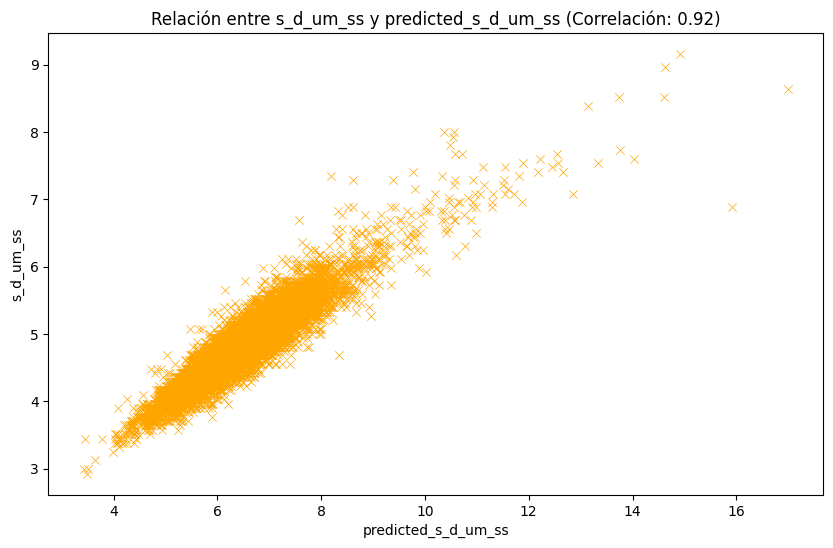

0.9225747460502269

In [72]:
# Filtrar las columnas importantes
df_filtered = df[['elongation_rate_ss', 'gen_time_min_ss', 's_b_um_ss', 's_d_um_ss']]

# Compute the predicted s_d_um_ss based on the elongation rate and generation time
df_filtered['predicted_s_d_um_ss'] = df_filtered['s_b_um_ss'] * np.exp(df_filtered['elongation_rate_ss'] * df_filtered['gen_time_min_ss'])

# Compute the correlation
correlation = df_filtered[['s_d_um_ss', 'predicted_s_d_um_ss']].corr().iloc[0, 1]

# Correlation plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='predicted_s_d_um_ss', y='s_d_um_ss', data=df_filtered, marker='x', color='orange')
plt.title(f'Relación entre s_d_um_ss y predicted_s_d_um_ss (Correlación: {correlation:.2f})')
plt.xlabel('predicted_s_d_um_ss')
plt.ylabel('s_d_um_ss')
plt.show()

# Correlation value
correlation

In [73]:
# Databse generation based on the model
np.random.seed(42)  # Para reproducibilidad
new_data = df_filtered.copy()

# Generate random noise in the independent variables
new_data['elongation_rate_ss'] += np.random.normal(0, 0.001, size=len(new_data))
new_data['gen_time_min_ss'] += np.random.normal(0, 1, size=len(new_data))
new_data['s_b_um_ss'] += np.random.normal(0, 0.1, size=len(new_data))

# Computing s_d_um_ss based on the model
new_data['s_d_um_ss'] = new_data['s_b_um_ss'] * np.exp(new_data['elongation_rate_ss'] * new_data['gen_time_min_ss'])

# Display the first few rows
new_data.head()

,elongation_rate_ss,gen_time_min_ss,s_b_um_ss,s_d_um_ss,predicted_s_d_um_ss
0,0.031968,31.497611,2.362368,6.466148,6.610794
1,0.033904,25.607186,2.613882,6.227739,6.039143
2,0.034290,31.833002,2.140610,6.376719,6.189668
3,0.034360,30.326563,2.023945,5.737714,5.744487
4,0.032217,35.716921,2.277812,7.198863,7.108208


In [74]:
new_data.to_csv('Model0', index=False)

### Model 1

_**Assumptions:**_
1) **Dependency:** $S_b$ and $S_d$ are not independent.
2) **Exponential Growth:** Cells elongate exponentially as $S_d = S_b2^{\lambda t_d}$.
3) **Normal Distribution:** The generated variables ($S_b$, $t_d$, $\lambda$) follow a normal distribution based on the original data's mean and standard deviation.
4) **Random Noise:** Realistic variations are introduced by adding random noise to the predicted values of $S_d$.

In [78]:
data = tsb

# Drop the specified columns
# data = data.drop(columns=['FOV_ID_ss', 'channel_ID_ss'])

# Display the first few rows of the data
data.head()

,elongation_rate_ss,gen_time_min_ss,s_b_um_ss,s_d_um_ss,delta_s_ss
0,0.062614,18.00,3.055,6.825,3.770
1,0.057214,20.25,3.250,7.410,4.160
2,0.056084,17.25,3.835,7.475,3.640
3,0.060448,18.00,3.445,7.345,3.900
4,0.053929,16.50,3.770,6.955,3.185


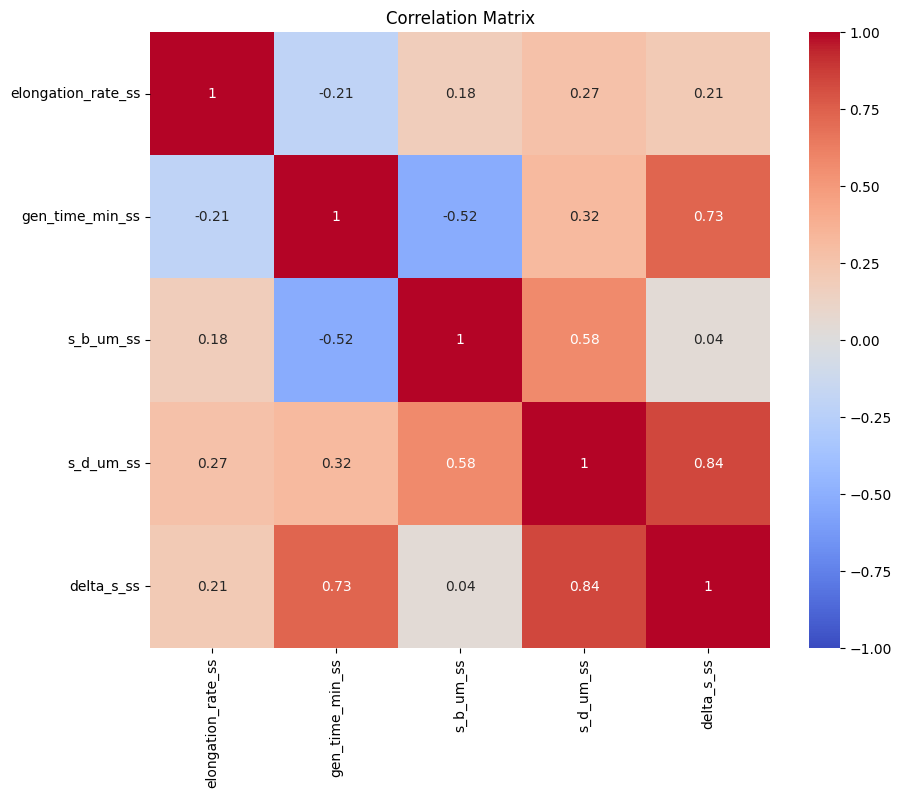

In [79]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

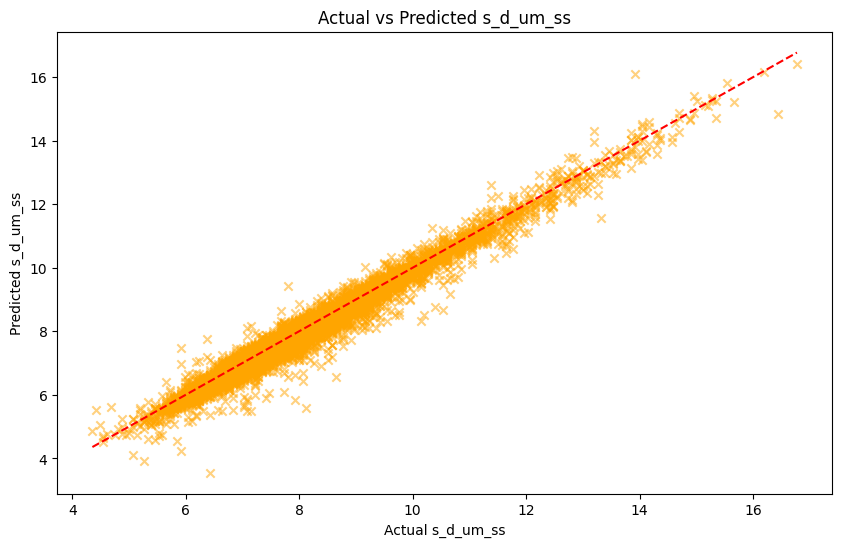

(0.1021279106774823, 0.2407923431262227)

In [80]:
# Calculate the predicted s_d_um_ss based on the given equation
data['s_d_um_ss_predicted'] = data['s_b_um_ss'] * 2**(data['elongation_rate_ss'] * data['gen_time_min_ss'])

# Compare the predicted values with the actual values
plt.figure(figsize=(10, 6))
plt.scatter(data['s_d_um_ss'], data['s_d_um_ss_predicted'], marker='x', color='orange', alpha=0.5)
plt.plot([data['s_d_um_ss'].min(), data['s_d_um_ss'].max()], 
         [data['s_d_um_ss'].min(), data['s_d_um_ss'].max()], 
         color='red', linestyle='--')
plt.xlabel('Actual s_d_um_ss')
plt.ylabel('Predicted s_d_um_ss')
plt.title('Actual vs Predicted s_d_um_ss')
plt.show()

# Calculate the error
data['error'] = data['s_d_um_ss'] - data['s_d_um_ss_predicted']
mean_error = data['error'].mean()
std_error = data['error'].std()

mean_error, std_error

In [81]:
# Define the number of samples for the new dataset
num_samples = len(data)

# Generate new data based on the model
new_data = pd.DataFrame()
new_data['s_b_um_ss'] = np.random.normal(data['s_b_um_ss'].mean(), data['s_b_um_ss'].std(), num_samples)
new_data['gen_time_min_ss'] = np.random.normal(data['gen_time_min_ss'].mean(), data['gen_time_min_ss'].std(), num_samples)
new_data['elongation_rate_ss'] = np.random.normal(data['elongation_rate_ss'].mean(), data['elongation_rate_ss'].std(), num_samples)

# Calculate s_d_um_ss using the provided equation and add noise
noise = np.random.normal(0, std_error, num_samples)
new_data['s_d_um_ss'] = new_data['s_b_um_ss'] * 2**(new_data['elongation_rate_ss'] * new_data['gen_time_min_ss']) + noise

# Display the first few rows of the new data
new_data.head()

,s_b_um_ss,gen_time_min_ss,elongation_rate_ss,s_d_um_ss
0,2.961431,13.256969,0.059448,4.991130
1,4.998601,13.292800,0.055447,8.153618
2,4.785962,17.506174,0.058270,9.979257
3,3.750085,13.920851,0.054106,6.233668
4,4.783931,16.320872,0.068102,10.292570


In [82]:
new_data.to_csv('Model1', index=False)

### Model 2

_**Assumptions**_
1) **$S_d$ dependence:** is modeled as dependent on $S_b$, $t_d$ and $\lambda$.
2) **Exponential Growth Model:** Assumes cell elongation follows an exponential relationship.
3) **Normal Distribution:** Assumes the normal distribution for generating new $S_b$, $\lambda$ and $t_d$. 

In [87]:
data = glycerol

# Ignore the columns 'FOV_ID_ss' and 'channel_ID_ss'
data = data.drop(columns=['FOV_ID_ss', 'channel_ID_ss'])

# Display the first few rows of the dataset
data.head()

,elongation_rate_ss,gen_time_min_ss,s_b_um_ss,s_d_um_ss,delta_s_ss
0,0.018897,51,1.820,3.770,1.950
1,0.017928,51,2.080,3.835,1.755
2,0.019121,54,1.950,4.095,2.145
3,0.019701,45,1.950,3.575,1.625
4,0.018382,66,1.755,4.290,2.535


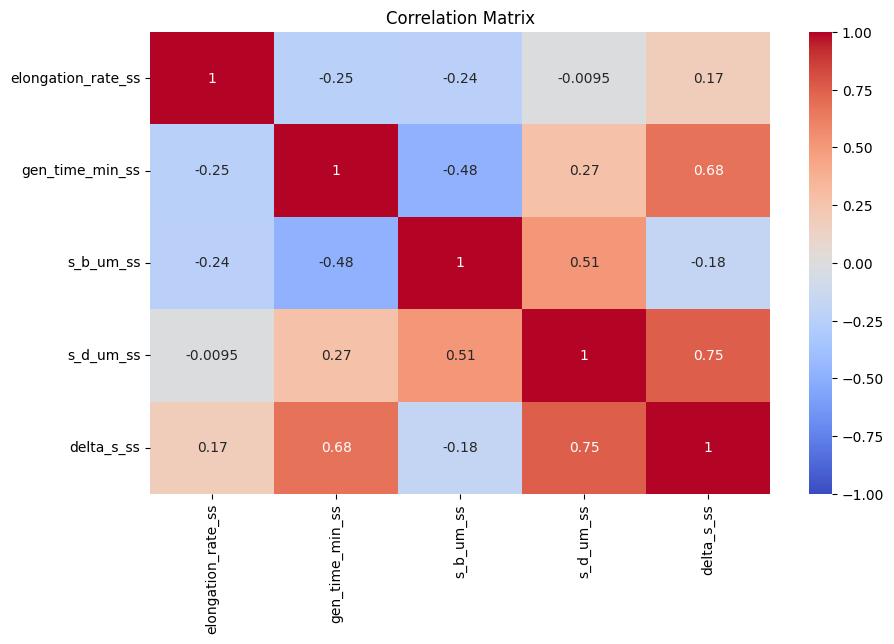

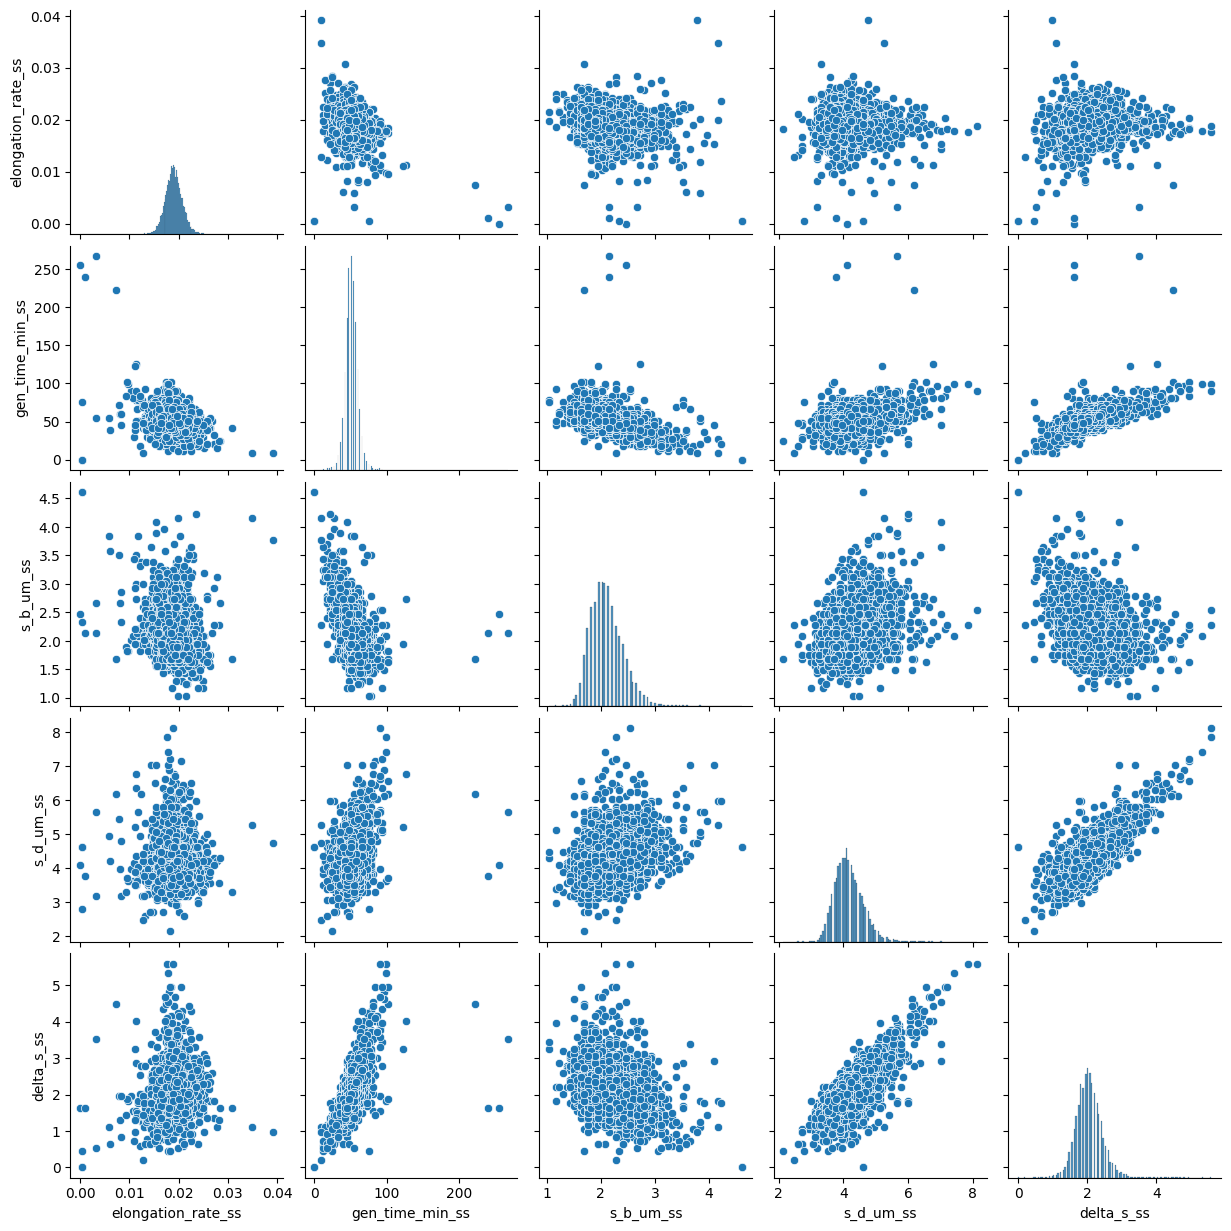

In [88]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Pairplot to visualize relationships
sns.pairplot(data)
plt.show()

In [90]:
# Define the model function
def model(x, b, c):
    s_b, elongation_rate, gen_time = x
    return b * s_b * np.exp(c * elongation_rate * gen_time)

# Prepare the data for curve fitting
x_data = (data['s_b_um_ss'], data['elongation_rate_ss'], data['gen_time_min_ss'])
y_data = data['s_d_um_ss']

# Fit the model
popt, pcov = curve_fit(model, x_data, y_data, maxfev=10000)
b, c = popt

# Print the fitted parameters
print(f"Fitted parameters: b = {b}, c = {c}")


Fitted parameters: b = 1.0184607371987182, c = 0.6848739491516003


In [91]:
# Generate synthetic data
num_samples = len(data)
s_b_new = np.random.normal(data['s_b_um_ss'].mean(), data['s_b_um_ss'].std(), num_samples)
elongation_rate_new = np.random.normal(data['elongation_rate_ss'].mean(), data['elongation_rate_ss'].std(), num_samples)
gen_time_new = np.random.normal(data['gen_time_min_ss'].mean(), data['gen_time_min_ss'].std(), num_samples)

s_d_new = b * s_b_new * np.exp(c * elongation_rate_new * gen_time_new)

# Create a new DataFrame
new_data = pd.DataFrame({
    's_b_um_ss': s_b_new,
    'elongation_rate_ss': elongation_rate_new,
    'gen_time_min_ss': gen_time_new,
    's_d_um_ss': s_d_new
})

In [92]:
# Save the new data
new_data.to_csv('Model2', index=False)